# Week 3 Assignment

Rishav Chaudhary

Presidential Graduate School, Kathmandu, Nepal

PRG 330: Python Programming with Data

Professor Tek Raj Panta

November 10, 2024


# Data Visualization using Matplotlib and Seaborn

## Understanding the CSV files used in this assignment
The schools.csv file is used here in this assignment as it was used in previous assignment as well. We will deal with this csv files which is gives  information regarding school name, borough building, building code, and average math, average writing, percent tested.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

schools = pd.read_csv('schools.csv')

print(schools.head())

                                         school_name    borough building_code  \
0  New Explorations into Science, Technology and ...  Manhattan          M022   
1                               Essex Street Academy  Manhattan          M445   
2                       Lower Manhattan Arts Academy  Manhattan          M445   
3    High School for Dual Language and Asian Studies  Manhattan          M445   
4      Henry Street School for International Studies  Manhattan          M056   

   average_math  average_reading  average_writing  percent_tested  
0           657              601              601             NaN  
1           395              411              387            78.9  
2           418              428              415            65.1  
3           613              453              463            95.9  
4           410              406              381            59.7  


## Inspection
Everything starts with first question that we need to know the answer of. So, here we use questions and will try to answer it through data manipulation and data visualization focusing on data visualization with Matplotlib and Seaborn to gain insight. The Question used here are:

- Which school have the highest average math scores?


The Stuyvesant High School has highest average math score which is 754.0


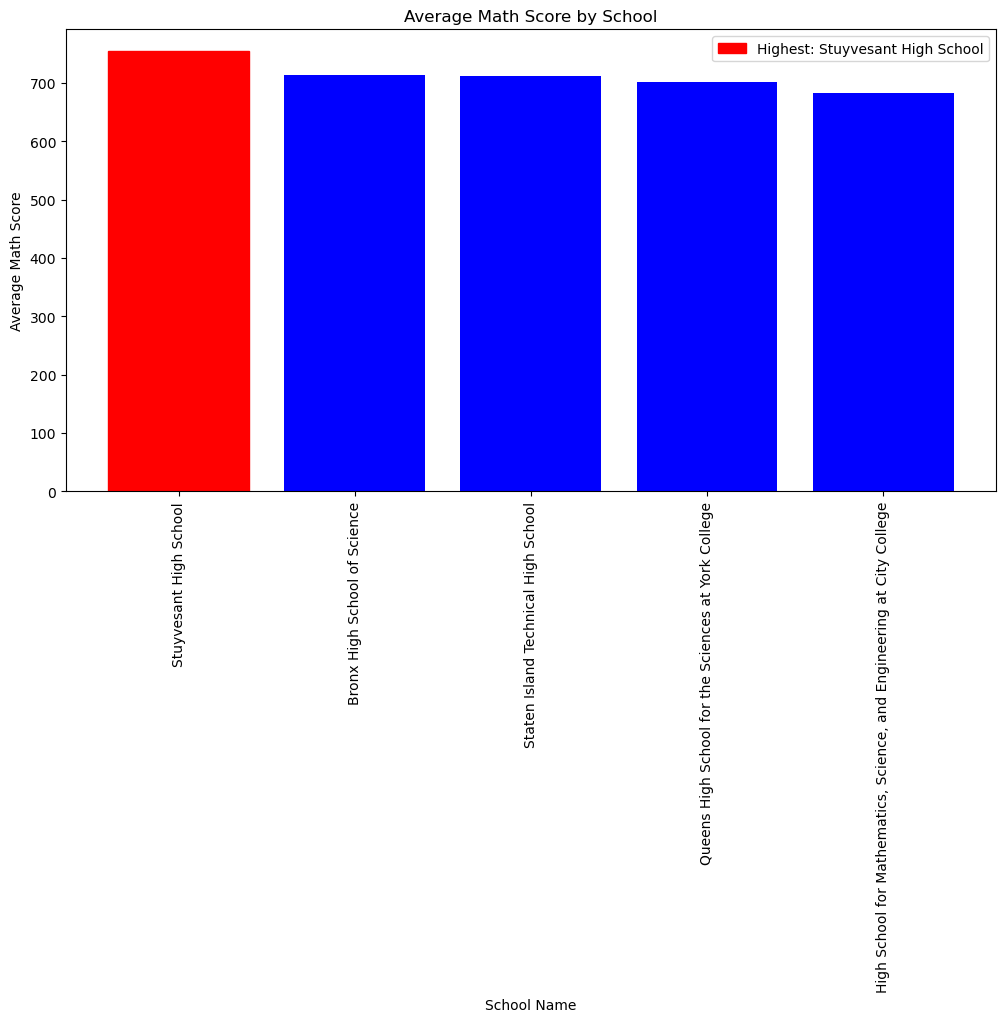

In [9]:
# Grouping school name and average_math score in desceding order to math score
school_avg_math_score = schools.groupby("school_name")["average_math"].mean().sort_values(ascending=False)

# Finding school_name with highest_math_score
highest_math_school_name = school_avg_math_score.idxmax()
highest_math_score = school_avg_math_score.max()


print(f"The {highest_math_school_name} has highest average math score which is {highest_math_score}")

# To bar plot it, we will use the matplotlib here
# Also, since the values are too much, we will only use few header values of sorted values
school_avg_math_score_head = school_avg_math_score.head()

plt.figure(figsize=(12, 6))
bars = plt.bar(school_avg_math_score_head.index, school_avg_math_score_head.values, color="blue")
plt.xticks(rotation=90)
plt.title("Average Math Score by School")
plt.xlabel("School Name")
plt.ylabel("Average Math Score")

# Just for highlighting the highest average math score bar with red
highest_index = school_avg_math_score_head.index.get_loc(highest_math_school_name)
bars[highest_index].set_color("red")

plt.legend([bars[highest_index]], [f"Highest: {highest_math_school_name}"], loc="upper right")

plt.show()

Now, since, the answer to question is done. Let's try it out with line plots, heatmaps and also use seaborn.

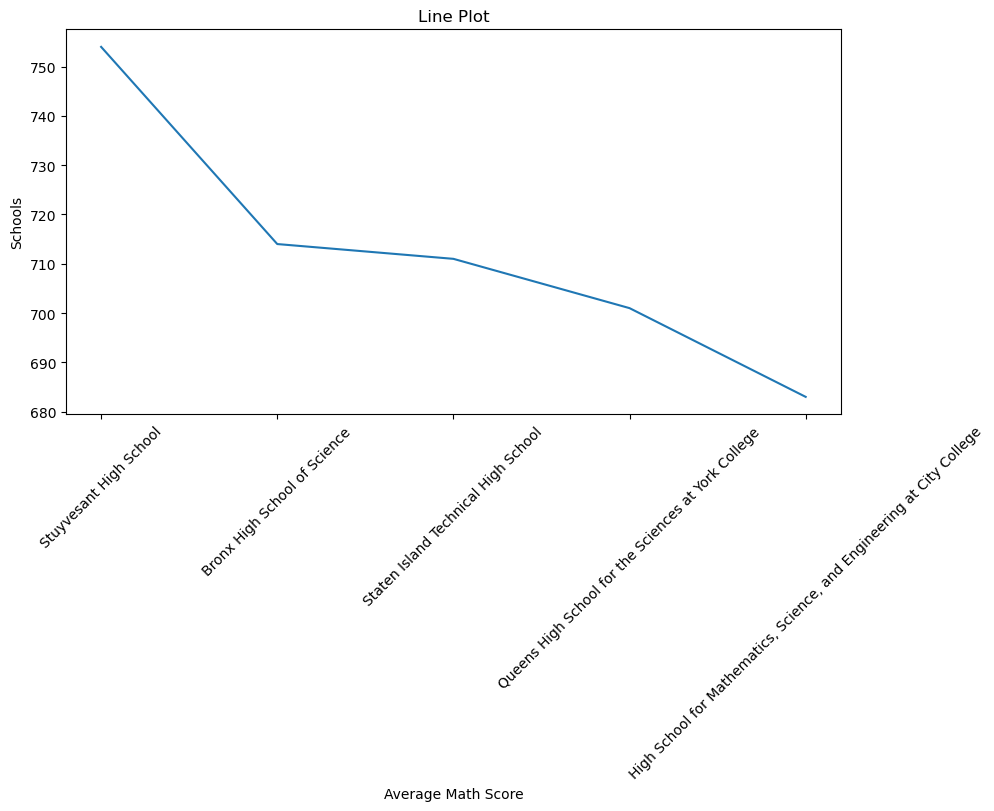

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(school_avg_math_score_head.index, school_avg_math_score_head.values)
plt.title("Line Plot")
plt.xlabel("Average Math Score")
plt.ylabel("Schools")
plt.xticks(rotation=45)

plt.show()

Heatmap is for visualizing the correlation between different variables. For this particular part, we will use seaborn module.

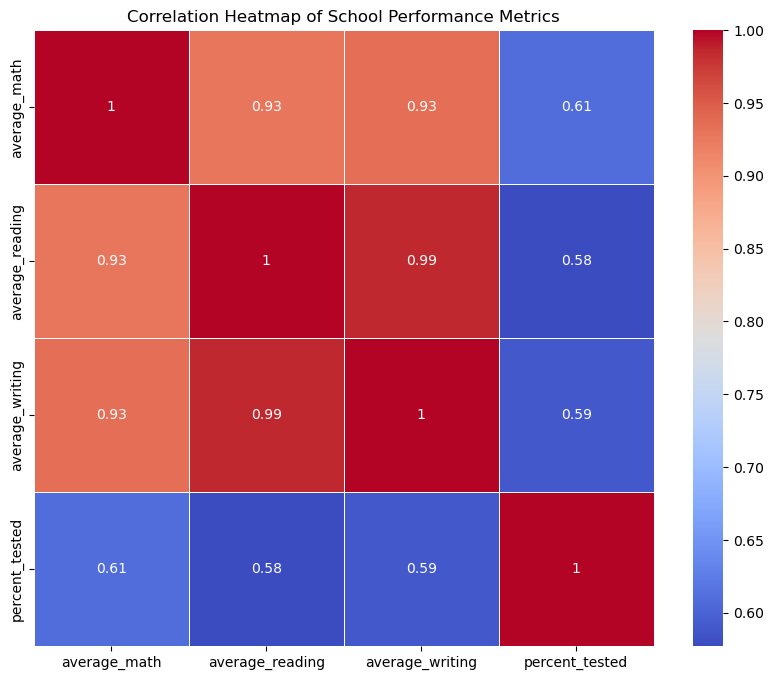

In [ ]:
import seaborn as sns

# Columns like average_math that we want to visualize
heatmap_data = schools[['average_math', 'average_reading', 'average_writing', 'percent_tested']]

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of School Performance Metrics')
plt.show()
